<a href="https://colab.research.google.com/github/nmningmei/Deep_learning_fMRI_EEG/blob/master/Han_et_al_2019_VAE_and_fMRI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from PIL import Image

# Introduction

1. understanding the human visual system requires not only measurements of brain activity but also computational models built upon hypotheses about neural computation and learning ([Kietzmann et al., 2017](https://oxfordre.com/neuroscience/view/10.1093/acrefore/9780190264086.001.0001/acrefore-9780190264086-e-46))
2. $$\text{encoding}: \text{visual input} \rightarrow \text{brain responses}$$ $$\text{decoding}: \text{brain responses} \rightarrow \text{conceptual information of the visual input}$$
3. evaluating the model's encoding and decoding performance can, at least in part, serve to test and compare hypotheses about how the brain learns and organizes visual representations ([Wu et al., 2006](https://pubmed.ncbi.nlm.nih.gov/16776594/))
<br />3.1. How to define "neural representation"?
4. the visual system consists of feature detectors that progressively extract and integrate features for pattern recognition:
<br />4.1. Gabor and wavelet filters in low-level system ([Hubel and Wiesel, 1962](https://pubmed.ncbi.nlm.nih.gov/14449617/); [van Hateren and van der Schaaf, 1998](https://www.researchgate.net/publication/51317415_Independent_component_filters_of_natural_images_compared_with_simple_cells_in_primary_visual_cortex_Proceedings_of_the_Royal_Society_of_London_Series_B_265_359-366))
<br />4.2. early visual areas ([Kay et al., 2008](https://www.nature.com/articles/nature06713); [Nishimoto et al., 2011](https://pubmed.ncbi.nlm.nih.gov/21945275/))
<br />4.3. CNNs encode hierarchical visual features in a fully-computable feedforward model ([LeCun et al., 2015](https://pubmed.ncbi.nlm.nih.gov/21945275/))
<br />4.4. intelligent tasks in computer vision ([He et al., 2016 - ResNet](https://www.cv-foundation.org/openaccess/content_cvpr_2016/papers/He_Deep_Residual_Learning_CVPR_2016_paper.pdf); [Krizhevsky et al., 2012 - AlexNet](https://www.semanticscholar.org/paper/ImageNet-classification-with-deep-convolutional-Krizhevsky-Sutskever/abd1c342495432171beb7ca8fd9551ef13cbd0ff); [Simonyan and Zisserman, 2014 -  VggNet](https://arxiv.org/abs/1409.1556v4))
<br />4.5. CNNs use similar representations as does the visual cortex ([Cichy et al., 2016](https://pubmed.ncbi.nlm.nih.gov/27282108/); [Khaligh-Razavi and Kriegeskorte, 2014](https://pubmed.ncbi.nlm.nih.gov/25375136/))
<br />4.6. state-of-the-art accuarcy in **encoding** and **decoding** brain responses to natural image or video stimuli ([Eickenberg et al., 2017](https://www.ncbi.nlm.nih.gov/pubmed/27777172/); [Guclu and van Gerven, 2015](https://www.ncbi.nlm.nih.gov/pubmed/26157000/); [Horikawa and Kamitani, 2017](https://www.ncbi.nlm.nih.gov/pubmed/28530228/); [Seeliger et al., 2018](https://www.ncbi.nlm.nih.gov/pubmed/28723578/); [Wen et al., 2017](https://www.ncbi.nlm.nih.gov/pubmed/29059288/); [Yamins et al., 2014](https://www.ncbi.nlm.nih.gov/pubmed/24812127/))
5. people claim that CNNs $\approx$ brain ([Kriegeskorte, 2015](https://www.ncbi.nlm.nih.gov/pubmed/28532370/); [Yamins and DiCarlo, 2016](https://www.ncbi.nlm.nih.gov/pubmed/26906502/))
6. the brain does **not** always learn by supervision but often learns from eperiences without supervision ([Barlow, 1989](http://learning.eng.cam.ac.uk/zoubin/course03/lect7mcmc.pdf)) and the brain uses bidirectional pathways ([Bastos et al., 2012](https://www.ncbi.nlm.nih.gov/pubmed/23177956/); [Salin and Bullier, 1995](https://www.ncbi.nlm.nih.gov/pubmed/7831395/))
7. the brain does semi- or un-supervised learning ([Barlow, 1989](http://learning.eng.cam.ac.uk/zoubin/course03/lect7mcmc.pdf); Hinton et al., 1999; [Seung and Lee, 2000](https://www.ncbi.nlm.nih.gov/pubmed/11188725/))
<br />7.1. unsupervised visual learning may utilize "analysis by synthesis" ([Hinton et al., 1995](https://www.ncbi.nlm.nih.gov/pubmed/7761831/); [Yuille and Kersten, 2006](https://www.ncbi.nlm.nih.gov/pubmed/16784882/)). *For example, DeepMind always uses VAE generated images as inputs for the downstream models so that this introduce "brain-like" vairation instead pure noise*
8. This hypothesis proposes that the brain learns by **re-generating**

## Personal interpretation

1. Eventhough the frontal- and parietal-areas does not "reconstruct" the perceived image per se, an assumption is that the information decoded by the frontal areas (frontal areas decodes the activities from the anterior areas) can be upscale and reconstruct to the oringal inputs (with some variance)
2. [DiCarlo and Cox (2007)](http://www.rowland.harvard.edu/rjf/cox/pdfs/TICS_DiCarloCox_2007.pdf) reported [that simple linear classifiers can rapidly (within $<$300 ms of image onset) and accurately decide the category of an object from the firing rates of an IT population of ~200 neurons, despite variation in object position and size](https://science.sciencemag.org/content/310/5749/863.abstract). Using "stronger" (non-linear) classifiers did not substantially improve recognition performance and the same nonlinear classifier fail when applied to a simulated V1 population of equal size. This shows that performance is NOT a result of the classifier themselves, but the powerful form of visual representation conveyed by the IT cortex $\rightarrow$ disentanglement of representations could be expressed by linear separatable patterns ([Kriegeskorte and Douglas, 2019](https://kriegeskortelab.zuckermaninstitute.columbia.edu/sites/default/files/content/KriegeskorteDouglas_2019_CurrOpinNeurobiol.pdf)).
3. In deep learning, there are 2 ways
<br />3.1. Generative adversial network
<br />3.2. (variantional) autoencoder

# Reconstruct images from brain responses

## Classical regression modeling

1. [Miyawaki et al., 2008](http://www.cell.com/neuron/abstract/S0896-6273%2808%2900958-6)
<img src="https://nilearn.github.io/_images/sphx_glr_plot_miyawaki_reconstruction_002.png" width=400>

## Classical Bayesian modeling


1. [Naselaris et al., 2017](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5553889/)
2. a Bayesian decoder that uses fMRI signals from early and anterior visual areas to reconstruct complex natural images
3. There is not much information in the anterior visual cortext but the information is rich
<img src="https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5553889/bin/nihms146513f5.jpg" width=400>

## Generative Adversarial network - **skipped**

1. [Seeliger et al., 2017](https://github.com/artcogsys/ganrecon)
2. Du et al., [2017](https://www.researchgate.net/publication/316471441_Sharing_deep_generative_representation_for_perceived_image_reconstruction_from_human_brain_activity), [2018](https://www.researchgate.net/publication/329594574_Reconstructing_Perceived_Images_From_Human_Brain_Activities_With_Bayesian_Deep_Multiview_Learning), [2019](https://www.researchgate.net/publication/333551321_Brain_Encoding_and_Decoding_in_fMRI_with_Bidirectional_Deep_Generative_Models)
3. [Shen et al., 2019](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6347330/)
4. [Ponce et al., 2019](https://www.researchgate.net/profile/Till-Hartmann-4/publication/332829763_Evolving_Images_for_Visual_Neurons_Using_a_Deep_Generative_Network_Reveals_Coding_Principles_and_Neuronal_Preferences/links/5cd023c7299bf14d957b36db/Evolving-Images-for-Visual-Neurons-Using-a-Deep-Generative-Network-Reveals-Coding-Principles-and-Neuronal-Preferences.pdf)

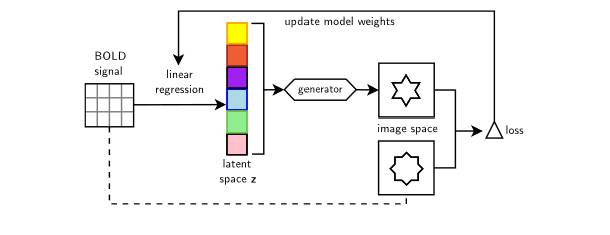

In [ ]:
Image.open('Screenshot 2021-03-25 160258.png')

[Generative adversarial networks for reconstructing natural images from brain activity](https://www.biorxiv.org/content/10.1101/226688v3.full)

<img src="https://www.researchgate.net/profile/Huiguang-He/publication/329594574/figure/fig5/AS:749584984854530@1555726395589/Image-reconstructions-of-distinct-handwritten-digits_W640.jpg">

<img src="https://www.researchgate.net/profile/Huiguang-He/publication/329594574/figure/fig1/AS:749584984838144@1555726395443/Illustration-of-the-proposed-DGMM-framework-a-Training-X-and-Y-are-fed-into-the_W640.jpg">

<img src="https://www.researchgate.net/publication/333551321/figure/fig2/AS:870139226488832@1584468766382/Illustration-of-the-deep-generative-multi-view-framework-for-neural-decoding-a-Model_W640.jpg">

<img src="https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6347330/bin/pcbi.1006633.g001.jpg">

<img src="https://www.ncbi.nlm.nih.gov/corecgi/tileshop/tileshop.fcgi?p=PMC3&id=522613&s=84&r=1&c=1">

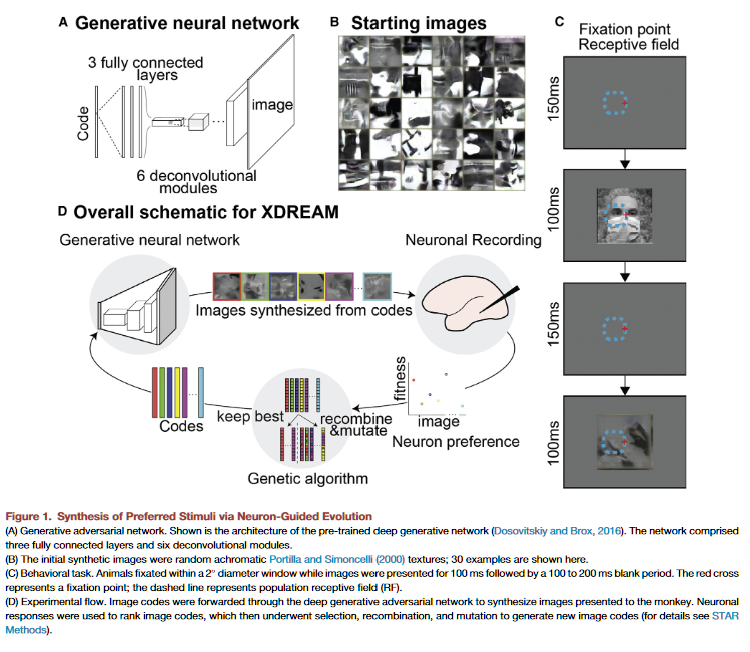

In [ ]:
Image.open("Screenshot 2021-03-31 173835.png")

[Even with high signal-to-noise ratio, GAN is a just a complex decoder.](https://www.researchgate.net/profile/Till-Hartmann-4/publication/332829763_Evolving_Images_for_Visual_Neurons_Using_a_Deep_Generative_Network_Reveals_Coding_Principles_and_Neuronal_Preferences/links/5cd023c7299bf14d957b36db/Evolving-Images-for-Visual-Neurons-Using-a-Deep-Generative-Network-Reveals-Coding-Principles-and-Neuronal-Preferences.pdf)

### Personal interpretation

$$\text{visual inputs} \in \text{information} = 100\%$$
$$f_\mathbb{B}(\text{visual inputs}) = \mathbb{W} \cdot \hat{\mathbb{B}} + \text{lost information}$$
$$\hat{\text{visual inputs}} = f_\mathbb{G}(\mathbb{W} \cdot \hat{\mathbb{B}}) + \epsilon$$
<img src="https://i.imgur.com/4ke0YHI.png">

## Autoencoder - how to use it incorrectly

### You use it to reconstruct the brain signals. This is to use lots of computational power to approximate a PCA and/or ICA model. And it is not robust.

# Method

## Variational Autoencoder

<img src="https://www.ncbi.nlm.nih.gov/corecgi/tileshop/tileshop.fcgi?p=PMC3&id=385778&s=89&r=1&c=1">

1. [Kingma and Welling, 2014](https://arxiv.org/abs/1312.6114v10), recommend to read Kingma's PhD thesis, which is better than all text books about autoencoder
$$\ell_\text{recon} = \Delta(|| \hat{X} - X||) = \mathbb{E}_q \text{log} [p_\text{recon}(\hat{X}|z)]$$
Gaussian likelihood of the reconstruction
<img src="https://miro.medium.com/max/700/1*ISFDOX2Ik9dRCcE5Wx3B-w.png">
$$\ell_\text{latent} = \mathbb{E}_q [\text{log} q(z|X) - \text{log} p_\text{recon}(z)]$$
where $p_\text{recon}(z)$ is learnable
<img src="https://miro.medium.com/max/700/1*ENmYlyj4LXhXvQ7v6JuYqA.png">
2. One can better control a VAE with an adversial component: <img src="https://www.researchgate.net/publication/343786548/figure/fig4/AS:926849605566464@1597989574061/The-illustrated-architecture-of-an-adversarial-autoencoder-A-discriminator-network-is_W640.jpg">

## Training VAE with diverse natural images

1. ReLU everywhere except the output (Sigmoid)
2. ImageNet ILSVRC2012 dataset ([Russakovsky et al., 2015](https://arxiv.org/pdf/1409.0575))) with 128 x 128 x 3
3. augmentations are applied
4. batch size = 200
5. latent size = 1024
6. ROIs: V1, V2, V3, V4, lateral occipital, middle temporal, fusiform face area, para-hippocampal place, temporo-parietal junction ([Glasser et al., 2016](https://www.ncbi.nlm.nih.gov/pubmed/27437579/))

## Experimental data

1. [Wen et al., 2017](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6215471/)
2. Each subject watched a diverse set of natural videos for a total length up to 13.7 hours
3. One data set was for training the models to predict the fMRI responses based on the input video (i.e. the encoding models) as well as the models to reconstruct the input video based on the measured fMRI responses (i.e. the decoding models)
4. The other data set was for testing the trained encoding or decoding models
5. Both the training and testing movies were further split into 8-min segments presented via an MRI-compatible binocular goggle during a single fMRI session
6. The testing movie included 5 segments (40 mins in total). Each subject watched the testing movie 10 times

## VAE-based encoding models

1. After training, VAE extracted the latent representation of any video by a feed-forward pass of every video frame into the encoder and reconstructed every video frame by a feedback pass of the latent representation into the decoder
2. To predict cortical fMRI responses to the video stimuli, an encoding model was defined separately for each voxel as a linear regression model ([Güçlü and van Gerven, 2014](https://www.ncbi.nlm.nih.gov/pubmed/25101625/); [Naselaris et al., 2011](https://www.ncbi.nlm.nih.gov/pubmed/20691790/))
3. PCA was applied to the feature representations obtained from each layer of the CNN given the training movie. Principal components were retained to keep 99% of the variance while spanning a much lower-dimensional feature space, in which the representations followed a similar distribution as did the fMRI signal
$$Y_o^l \text{ is m_frames by p_units}$$
$$Y_n^l \text{ is p_units by q_components}$$
$$Y_n^l = Y_o^l \cdot B^l$$
$$(f_{HRF} \ast Y_n^l)[n]=\sum_{m=-\infty}^{\infty} f_{HRF}[m] z[n-m]$$
$$\text{downsampled}$$
$$w^l_v \text{ is q_components by 1}$$
$$x_v = Y^l \cdot w^l_v + b^l_v + \epsilon$$
4. $x_v$ is a time series of a single voxel
5. 3-fold cross validation was used to estimate the L2 regression model and to optimize the hyperparameters ($\lambda$, $l$). The entire training was refitted after cross validation before testing on an independent test data
6. a block permutation test ([Adolf et al., 2014](https://www.ncbi.nlm.nih.gov/pubmed/25165444/)) was used to estimate the statistical significance
7. For the ROI analysis, the voxel-wise prediction accuracy was averaged within each ROI. The prediction accuracy was evaluated for each subject, and then compared and averaged across subjects.
8. variance explained upper bound estimation (I don't fully understand) ([David and Gallant, 2005](https://www.ncbi.nlm.nih.gov/pubmed/16411498/); [Nili et al., 2014](https://www.ncbi.nlm.nih.gov/pubmed/24743308/); [Kay et al., 2013](https://www.ncbi.nlm.nih.gov/pubmed/23615546/))

## Additional CNN models

1. CNN-A (architecture-matched), its architecture was constrained to be identical to the architecture of the encoder in the VAE
2. Global averaged pooling ([Lin et al., 2013](https://arxiv.org/abs/1312.4400)) was applied to the last convolutional layer, followed by logistic regression to output a probabilistic distribution over pre-defined image categories
3. CNN-A was trained for image classification based on labeled images in ImageNet ([Russakovsky et al., 2015](https://arxiv.org/pdf/1409.0575))). Therefore, CNN-A and VAE shared the same architecture but used different learning objectives
4. CNN-AP (architecture- and PC-matched)
5. base-line model: Gabor filters ([Fogel and Sagi, 1989](https://www.academia.edu/download/30815323/FogelSagi_BC89.pdf); [Marcelja, 1980](https://www.ncbi.nlm.nih.gov/pubmed/7463179/); [Kay et al., 2008](https://www.ncbi.nlm.nih.gov/pubmed/18322462/); [Naselaris et al., 2011](https://www.ncbi.nlm.nih.gov/pubmed/20691790/); [Nishimoto et al., 2011](https://www.ncbi.nlm.nih.gov/pubmed/21945275/))
6. ResNet-18 as another alternative model ([He et al., 2016](https://pdfs.semanticscholar.org/7d64/b7c579b069620f579bd8a15e27ebf1bb4388.pdf))
<img src="https://www.researchgate.net/profile/Muhammad_Hasan19/publication/323063171/figure/fig1/AS:603178554904576@1520820382219/Proposed-Modified-ResNet-18-architecture-for-Bangla-HCR-In-the-diagram-conv-stands-for.jpg">

## Decoding fMRI for visual reconstruction

1. we trained and tested the decoding model for reconstructing visual input from distribution fMRI responses
2. transforming the fMRI responses pattern to the latent variables in VAE through a linear regression model
3. transforming the latent variables to pixel patterns through the VAE's decoder
4. only the visual cortex is used
$$\mathbf{z} = U \cdot \mathbf{y} + \mathbf{c} + \epsilon$$
$$\hat{x}^j = \Theta(\hat{z}^j) = \Theta(\hat{U} \cdot y^j + \hat{c})$$
$$\text{where } \Theta \text{ is the VAE's decoder}$$

## Accounting for the hemodynamic delay

1. for training the decoding model. we first convolved the latent variables with a canoical HRF
2. we optimized the decoding parameters to estimate the HRF-convolved latent variables given the fMRI responses at every time point
3. for testing the decoding model, we used the trained decoding model to estimate the latent variables given the unknown visual input and the known fMRI response pattern at a given time t
4. the decoded latent variables were used to reconstruct the visual input, which was assumed to occur 4 secondss before the time of response (Nishimoto et al., 2011)
5. alternatively, we trained a linear regression model for deconvolution as elaborated in [Huth et al., 2016](https://www.ncbi.nlm.nih.gov/pubmed/27781035/). (a time-lag regression)


## Evaluation of decoding performance

1. structural similarity index (SSIM, [Wang et al., 2004](https://www.ncbi.nlm.nih.gov/pubmed/15376593/)) between every reconstructed video frame and the true frame, yielding a measure of the similarity in the pattern of pixel intensity
2. we evaluated the degree to which the reconstructed movie preserved the color information in the original movie (RGB $\rightarrow$ hue value, circular correlation, [Berens, 2009](http://web.engr.oregonstate.edu/~mjb/cs553/Projects/Papers/J-Stat-Softw-2009-Berens_6037[0].pdf); Jammalamadaka and Sengupta, 2001)
3. *we disentangled colors and semantic segmentations of the image*, so we converted every testing movie frame from a color image to a gray-scaled image
4. Another baseline model: PCA + L1-regression to decode fMRI using the pixel images (partial least square regression, [Tenenhaus, et al., 2005](https://www.academia.edu/download/45804262/PLS_path_modeling20160520-4493-1nacn8f.pdf); [Cowen et al., 2014](https://www.ncbi.nlm.nih.gov/pubmed/24650597/))

# Results

## VAE provided compressed representations of natural images

<img src="https://www.ncbi.nlm.nih.gov/corecgi/tileshop/tileshop.fcgi?p=PMC3&id=385789&s=89&r=1&c=1">

## VAE predicted movie-induced cortical responses

1. Given a natural movie as visual input, we further asked to what extent the model dynamics in VAE could be used to model and predict the movie-induced cortical responses. 
2. After dimension reduction, the unit responses of VAE was represented in terms of 5,816 principal components. 
3. A linear combination of these components, as defined by a voxel-wise encoding model, was used to predict how each voxel in the brain responded to a visual stimulus. 
4. Specifically, the encoding model was trained separately for each voxel by fitting the voxel response to a training movie as a linear combination of the VAE’s responses to the same movie. 
5. Then, the trained voxel-wise encoding model was tested with an independent testing movie (not used for training) to evaluate the model’s prediction accuracy (i.e. the correlation between the predicted and measured fMRI responses). 

<img src="https://www.ncbi.nlm.nih.gov/corecgi/tileshop/tileshop.fcgi?p=PMC3&id=385794&s=89&r=1&c=1">

The accuracy was measured by the Pearson’s correlation coefficient (r) between the model-predicted response and the actual fMRI response. The map shows the r value averaged across the five testing movies. The map was thresholded by statistical significance (FDR q < 0.01). For intra-subject encoding, the results are shown on the flattened (only for Subject 1) and inflated cortical surfaces (for every subject) as in the first and second rows. For inter-subject encoding, the results are shown in the third row.

6. The encoding performance was further evaluated for individual ROIs selected from different levels of the visual hierarchy. The ROI-level analysis confirmed the results from the voxel-level analysis

<img src="https://www.ncbi.nlm.nih.gov/corecgi/tileshop/tileshop.fcgi?p=PMC3&id=385799&s=89&r=1&c=1">

For each feature model, the accuracy of encoding model in predicting the fMRI response to the testing movie was summarized for each of the nine pre-defined ROIs. The compared models are: variational autoencoder (VAE), VAE encoder and VAE decoder. Arranged from the left to the right, individual ROIs are located in increasingly higher levels of the visual hierarchy. The bar chart is based on the mean $\pm$ SEM (standard error of the mean) of the voxel-wise prediction accuracy averaged across all the voxels in each ROI, and across different testing movies and subjects. The bars in the lightest color indicate the mean and the standard derivation of the noise-ceilings in each ROI.

## Comparing the encoding performance across different models

1. We further compared the encoding performance between VAE and two alternative models: gray-scale Gabor filters (Kay et al., 2008) and feedforward-only ResNet-18
2. After dimension reduction, Gabor filters gave rise to 1,122 features, ResNet gave rise to 7,564 features, whereas VAE gave rise to 5,816 features

<img src="https://www.ncbi.nlm.nih.gov/corecgi/tileshop/tileshop.fcgi?p=PMC3&id=385804&s=89&r=1&c=1">

The prediction accuracy (the z-transformed correlation between the predicted and measured fMRI responses) is displayed on inflated cortical surfaces for the encoding models based on VAE (top-left) and ResNet-18 (top-middle). Their difference (ResNet – VAE) in the prediction accuracy is displayed on both inflated (top-right) and flattened (bottom) cortex.

3. We further asked whether the difference in encoding performance between VAE and CNN was due to their difference in learning objective, architecture, or dimensionality
4. To address this question, we defined two encoding models based on a CNN that used the same architecture as that of the encoder in VAE. This CNN, herein referred to as CNN-A, achieved 60.23% top-1 accuracy for image classification with data from ImageNet (more specifically the validation set of ILSVRC2012)
5. CNN-A gave rise to 9,081 features after dimension reduction applied in the same way as for VAE
6. **The encoding models based on CNN-A (without residual connections) were less predictive of fMRI responses than was ResNet. However, CNN-A still outperformed VAE for all ROIs, and the difference progressively increased from lower to higher areas**
7. We further constrained the number of encoding parameters for CNN-A to be identical to that for VAE
8. the encoding models so constrained for the number of free parameters (referred to as CNN-AP) yielded similar encoding accuracies as those of CNN-A
9. 

<img src="https://www.ncbi.nlm.nih.gov/corecgi/tileshop/tileshop.fcgi?p=PMC3&id=385809&s=89&r=1&c=1">

For each feature model, the accuracy of encoding model in predicting the fMRI response to the testing movie was summarized for each of the nine pre-defined ROIs. The compared models are: variational autoencoder (VAE), CNN with constraint on its architecture (CNN-A) and CNN with constraint on its architecture and parameters (CNN-AP). Arranged from the left to the right, individual ROIs are located in increasingly higher levels of the visual hierarchy. The bar chart is based on the mean$\pm$SEM (standard error of the mean) of the voxel-wise prediction accuracy averaged across all the voxels in each ROI, and across different testing movies and subjects. The bars in the lightest color indicate the mean and the standard derivation of the noise-ceilings in each ROI.

<img src="https://www.ncbi.nlm.nih.gov/corecgi/tileshop/tileshop.fcgi?p=PMC3&id=385814&s=89&r=1&c=1">

The difference in prediction accuracy (the z-transformed correlation between the predicted and measured fMRI responses) is displayed on inflated/flattened cortical surfaces. For VAE and CNN with constraint on its architecture (CNN-A), their difference (CNN-A – VAE) in the prediction accuracy is displayed on both inflated (top-left) and flattened (bottom) cortex. For VAE and CNN with constraint on its architecture and parameters (CNN-AP), their difference (CNN-AP – VAE) in the prediction accuracy is displayed on inflated (top-right) cortex.

# Alternatively

<img src="https://www.eneuro.org/content/eneuro/5/3/ENEURO.0443-17.2018/F2.large.jpg?width=800&height=600&carousel=1" width="600">

Study design. **A**, The stimulus sequence was divided into sequences of four stimuli each. Stimuli in the same sequence contained different blur levels of the same image organized from the highest blur level (25%) to the lowest (0%). Each stimulus was presented for 8 s. **B**, Overview of the feature decoding analysis protocol; fMRI activity was measured as the subjects viewed the stimulus images presented, described in **A**. Trained decoders were used to predict DNN features from fMRI activity patterns. The decoded features were then analyzed for their similarity with the true DNN features of both the original image ($r_o$) and stimulus image ($r_s$). The same procedure was also conducted for noise-matched DNN features that are composed of true DNN features with additional Gaussian noise to match predicted features from fMRI.